# 第五章 词性（词类）和词性标注

In [1]:
%matplotlib inline
import nltk
from nltk import word_tokenize

## 词性和词性标注

使用词性标注器处理词的序列，为每个词附加一个词性标记

In [2]:
#无歧义的情况
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [3]:
#有歧义的情况
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

### 词性标注器的作用

表征词语的用法，为结构分析服务

In [6]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')
#搜索woman找到名词，搜索bought 找到是动词；搜索over 会找到介词；搜索the 找到限定词

man time day year car moment world house family child country boy
state job place way war girl work word


## 表示已标注的标识符

已标注的标识符使用由标识符和标记组成的元组来表示

可以使用函数str2tuple从表示已标注的标识符的标准字符串创建这样的元组

In [8]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [9]:
tagged_token[0]

'fly'

从一个字符串构造一个已经标注标识符的链表

In [11]:
sent = "This/AT is/IN a/AT wonderful/JJ day/NN"
[nltk.tag.str2tuple(t) for t in sent.split()]

[('This', 'AT'), ('is', 'IN'), ('a', 'AT'), ('wonderful', 'JJ'), ('day', 'NN')]

## 读取标注语料库

布朗库和词性映射

In [10]:
nltk.corpus.brown.tagged_words?

In [12]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [13]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [14]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [15]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

### 常见词性

In [4]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories = 'news',tagset='universal')
tag_fd = nltk.FreqDist(tag for (word,tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

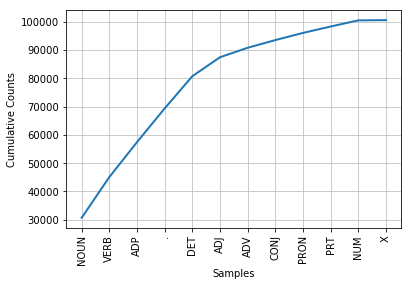

In [5]:
tag_fd.plot(cumulative = True)
#画图

经常出现在名词之前的词性

In [6]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)#一对（一个词，一个标签）
noun_preceders = [a[1] for (a,b) in word_tag_pairs if b[1] == 'NOUN']
#word_tag_pairs
#brown_news_tagged = brown.tagged_words(categories = 'news',tagset='universal')
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag,_) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

In [13]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
next(word_tag_pairs)

(('The', 'DET'), ('Fulton', 'NOUN'))

新闻文本中最常见的动词

In [21]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


In [15]:
word_tag_fd

FreqDist({('Pierre', 'NOUN'): 1,
          ('Vinken', 'NOUN'): 2,
          (',', '.'): 4885,
          ('61', 'NUM'): 5,
          ('years', 'NOUN'): 115,
          ('old', 'ADJ'): 24,
          ('will', 'VERB'): 280,
          ('join', 'VERB'): 4,
          ('the', 'DET'): 4038,
          ('board', 'NOUN'): 30,
          ('as', 'ADP'): 333,
          ('a', 'DET'): 1874,
          ('nonexecutive', 'ADJ'): 5,
          ('director', 'NOUN'): 32,
          ('Nov.', 'NOUN'): 24,
          ('29', 'NUM'): 5,
          ('.', '.'): 3828,
          ('Mr.', 'NOUN'): 375,
          ('is', 'VERB'): 671,
          ('chairman', 'NOUN'): 45,
          ('of', 'ADP'): 2319,
          ('Elsevier', 'NOUN'): 1,
          ('N.V.', 'NOUN'): 3,
          ('Dutch', 'NOUN'): 1,
          ('publishing', 'VERB'): 4,
          ('group', 'NOUN'): 43,
          ('Rudolph', 'NOUN'): 3,
          ('Agnew', 'NOUN'): 1,
          ('55', 'NUM'): 10,
          ('and', 'CONJ'): 1505,
          ('former', 'ADJ'): 19,
    

In [26]:
wsj.index?

### 关于词性的条件频率表

给定词，按频率降序输出词性列表

In [19]:
cfdl = nltk.ConditionalFreqDist(wsj)#从配对链表中创建条件概率分布
cfdl['yield'].most_common()#此条件下给定样本的频率

[('VERB', 28), ('NOUN', 20)]

给定词性，按频率降序输出词性列表

In [23]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
cfd2['VBN'].most_common()

[('been', 150),
 ('expected', 52),
 ('made', 33),
 ('compared', 32),
 ('based', 31),
 ('used', 26),
 ('priced', 26),
 ('sold', 25),
 ('named', 20),
 ('designed', 20),
 ('held', 18),
 ('fined', 18),
 ('taken', 16),
 ('paid', 15),
 ('traded', 15),
 ('increased', 14),
 ('said', 14),
 ('filed', 13),
 ('reached', 13),
 ('called', 13),
 ('scheduled', 13),
 ('disclosed', 13),
 ('reported', 12),
 ('proposed', 12),
 ('estimated', 12),
 ('set', 12),
 ('known', 12),
 ('built', 11),
 ('approved', 11),
 ('given', 11),
 ('acquired', 11),
 ('found', 10),
 ('offered', 10),
 ('received', 10),
 ('caused', 9),
 ('considered', 9),
 ('ordered', 9),
 ('required', 9),
 ('preferred', 9),
 ('led', 9),
 ('issued', 9),
 ('fixed', 9),
 ('listed', 9),
 ('prepared', 9),
 ('involved', 9),
 ('aimed', 9),
 ('needed', 9),
 ('launched', 8),
 ('produced', 8),
 ('put', 8),
 ('planned', 8),
 ('seen', 8),
 ('alleged', 8),
 ('valued', 8),
 ('barred', 8),
 ('become', 7),
 ('related', 7),
 ('improved', 7),
 ('changed', 7),
 ('

输出这个词的前四个单词
[2:4]就是2,3（前含后不含）

In [25]:
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1-4:idx1+1]#idx1+1是它后面一个，但后面一个是不含的

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

## 未简化的标记

名词NN的变种：含有$的名词所有格,含有S的复数名词，含有P的专有名词
后缀修饰符：-NC表示引用，-HL表示标题中的词，-TL表示标题

找出所有以NN开头的tag，对于每一种tag打出最常用的五个词

In [31]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word,tag) in tagged_text 
                                   if tag.startswith(tag_prefix))
    return {tag:cfd[tag].most_common(5) for tag in cfd.conditions()}

In [32]:
tagdict = findtags('NN',nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag,tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

In [33]:
tagdict

{'NN': [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)],
 'NN$': [("year's", 13),
  ("world's", 8),
  ("state's", 7),
  ("nation's", 6),
  ("city's", 6)],
 'NN$-HL': [("Golf's", 1), ("Navy's", 1)],
 'NN$-TL': [("President's", 11),
  ("Administration's", 3),
  ("Army's", 3),
  ("League's", 3),
  ("University's", 3)],
 'NN-HL': [('sp.', 2),
  ('problem', 2),
  ('Question', 2),
  ('cut', 2),
  ('party', 2)],
 'NN-NC': [('ova', 1), ('eva', 1), ('aya', 1)],
 'NN-TL': [('President', 88),
  ('House', 68),
  ('State', 59),
  ('University', 42),
  ('City', 41)],
 'NN-TL-HL': [('Fort', 2),
  ('Mayor', 1),
  ('Commissioner', 1),
  ('City', 1),
  ('Oak', 1)],
 'NNS': [('years', 101),
  ('members', 69),
  ('people', 52),
  ('sales', 51),
  ('men', 46)],
 'NNS$': [("children's", 7),
  ("women's", 5),
  ("men's", 3),
  ("janitors'", 3),
  ("taxpayers'", 2)],
 'NNS$-HL': [("Dealers'", 1), ("Idols'", 1)],
 'NNS$-TL': [("Women's", 4),
  ("States'", 3),
  ("Giants'", 2),
  ("Prince

### 查找标记的解释

In [34]:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


### 查看跟在often 后面的词语

In [36]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))
#加set表示没有重复元素

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [39]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a,b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
#b[1]是often后面的词的标签
fd = nltk.FreqDist(tags)
fd.tabulate()#变成表格

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


查找多词性的词

In [41]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) 
                                for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        #print(data[word])
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

<FreqDist with 4 samples and 31 outcomes>
best ADJ ADV VERB NOUN
<FreqDist with 4 samples and 12 outcomes>
close ADV ADJ VERB NOUN
<FreqDist with 4 samples and 33 outcomes>
open ADJ VERB NOUN ADV
<FreqDist with 4 samples and 30 outcomes>
present ADJ ADV NOUN VERB
<FreqDist with 4 samples and 829 outcomes>
that ADP DET PRON ADV


## 字典

In [45]:
pos={}
pos[1]='hi'
pos[2]='oh'
pos

{1: 'hi', 2: 'oh'}

使用键来检索值

In [47]:
pos[1]

'hi'

In [48]:
list(pos)#把key变成列表
#相当于list(pos.keys())

[1, 2]

In [51]:
list(pos.values())

['hi', 'oh']

In [52]:
list(pos.items())

[(1, 'hi'), (2, 'oh')]

### 定义字典

使用键值对

In [54]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')
pos

{'colorless': 'ADJ', 'furiously': 'ADV', 'ideas': 'N', 'sleep': 'V'}

### 默认字典

Defaultdict：为新键自动创建条目并赋予默认值

In [55]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']#第一次访问是0

0

In [57]:
pos = defaultdict(list)
pos['sleep'] = ['NOUN', 'VERB']
print(pos['ideas'])
print(pos['sleep'])

[]
['NOUN', 'VERB']


In [58]:
pos = defaultdict(lambda: 'NOUN')
#lamda:'NOUN' 相当于return ‘NOUN’
pos['colorless'] = 'ADJ'
pos['blog'] 

'NOUN'

## 利用默认词典处理未登录词

最频繁的n个词将被映射到它们自己。其他的被映射到UNK （out of vocabulary）

In [59]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')#其他词设为UNK
for v in v1000:#前1000个最频繁的词还是等于自己
    mapping[v] = v
alice2 = [mapping[v] for v in alice]
alice2[:100]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'UNK',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'UNK',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',']

### 增量式更新词典

In [60]:
counts = defaultdict(int)
#先创建一个默认的字典
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1
    #当有词出现的时候，就在该word的数量上+1

sorted()的第一个参数是要排序的项目（由POS 标记和频率组成的元组）列表

sorted()的第二个参数使用函数itemgetter()指定排序键

itemgetter(n)，返回一个函数，这个函数可以被其他序列对象调用获得这个序列的第n 个元素

In [61]:
from operator import itemgetter
sorted(counts.items(), key=itemgetter(1), reverse=True)#倒序排列
#针对每一个item 如（‘DET’，11389）取第一个即11389进行排序

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [63]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X']

### 创建anagram词典

In [64]:
words = nltk.corpus.words.words('en')
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))#对每个单词重新排序
    anagrams[key].append(word)#把他加入对应单词字母的列表里
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

等价于下面这种形式

In [66]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

### 倒排词典

反向查找

In [68]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)
pos2['ADV']

['furiously', 'peacefully']

等价于下面这种做法

index会把一个列表中的每个元组的第一个值作为key，对key相同的元组第二个值合并为一个列表作为value

In [69]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

['furiously', 'peacefully']

## 自动标注

brown_tagged_sents是人工标注的句子（正确答案，或称为金标准, gold standard）

brown_sent是未标记的句子

当标注器对给定词猜测的标记与金标准相同，标注器被视为正确

In [71]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
print(brown_tagged_sents)
print(brown_sents)

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

### 默认标注器

为每个词语分配相同的词性标记，用最有可能（概率最大）的词性标注每个词

精度低！

In [74]:
default_tagger = nltk.DefaultTagger('NN')
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

### 正则表达式标注器

In [75]:
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds动名词
    (r'.*ed$', 'VBD'),                # simple past一般过去式
    (r'.*es$', 'VBZ'),                # 3rd singular present第三人称单数
    (r'.*ould$', 'MD'),               # modals情态动词
    (r'.*\'s$', 'NN$'),               # possessive nouns名词所有格
    (r'.*s$', 'NNS'),                 # plural nouns名词复数
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers基数词
    (r'.*', 'NN')                     # nouns (default)默认名词
    ]
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [76]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

### 查表标注器

找出100个最频繁的词，存储它们最可能的词性标记，作为“查表标注器”，之后构建UnigramTagger

In [77]:
from nltk.corpus import brown
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [78]:
sents = brown.sents(categories='news')[3]
baseline_tagger.tag(sents)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

回退：先使用查表标注，如果找不到对应的条目再使用默认标注器

是自动标注的一种重要思想

实现：通过指定一个标注器作为另一个标注器的参数

In [79]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

In [80]:
baseline_tagger.evaluate(brown_tagged_sents)

0.5817769556656125

### 查表标注器的性能

用不同大小的模型建立查表标注器

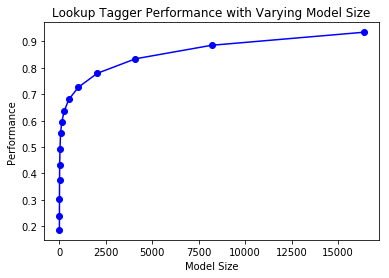

In [81]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
display()

In [84]:
import pylab

In [85]:
sizes = 2 ** pylab.arange(15)

In [86]:
sizes

array([    1,     2,     4,     8,    16,    32,    64,   128,   256,
         512,  1024,  2048,  4096,  8192, 16384], dtype=int32)